In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [3]:
plt.style.use('seaborn')


In [4]:
# DATA
mean_01= np.array([1,0.5])
cov_01= np.array([[1,0.1],[0.1,1.2]])

mean_02= np.array([4,5])
cov_02= np.array([[1.21,0.1],[0.1,1.3]])


dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
# random.multivariate_normal makes a distribution of randome variables. 
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)



In [12]:
type(dist_02)

numpy.ndarray

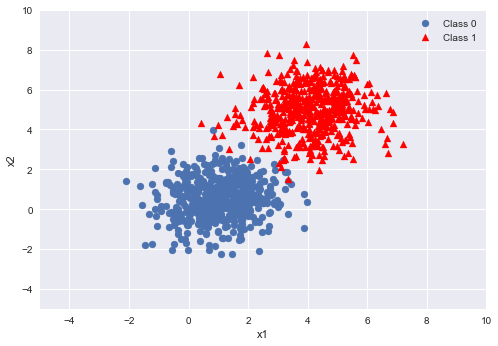

In [50]:
# Data Visualization
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [51]:
data = np.zeros((1000,3))
print(data.shape)

data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0
print(data)


(1000, 3)
[[ 1.00658835 -1.16059235  0.        ]
 [ 0.68674196 -2.03779099  0.        ]
 [ 1.82692856  1.62891994  0.        ]
 ...
 [ 3.87055406  4.97504285  1.        ]
 [ 6.47097195  4.01105219  1.        ]
 [ 4.40176749  2.7398987   1.        ]]


In [52]:

#shuffled the data
np.random.shuffle(data)
##type of split
split = int(0.8*data.shape[0])
print(split)
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)


800
(800, 2) (200, 2)
(800,) (200,)


In [53]:
#Logistic Regression

def hypothesis(x,w,b): # = z
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z): 
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b): #Cost function
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    return -err/m

def get_grads(y_true,x,w,b): #Gradient Descent
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)

    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]


    
    

In [54]:
loss = [] # = Error
acc = []
W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random() #random Vector

In [55]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

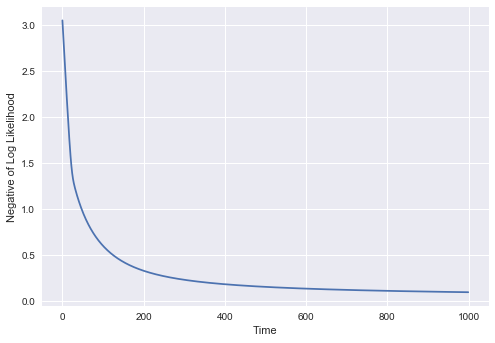

In [56]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

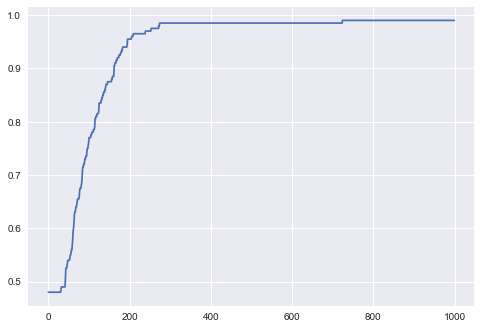

0.99


In [57]:
plt.plot(acc)
plt.show()
print(acc[-1])

In [58]:
print(W)
print(b)
#draw line with the help of these

[0.61835263 1.33641463]
-4.667351401119959


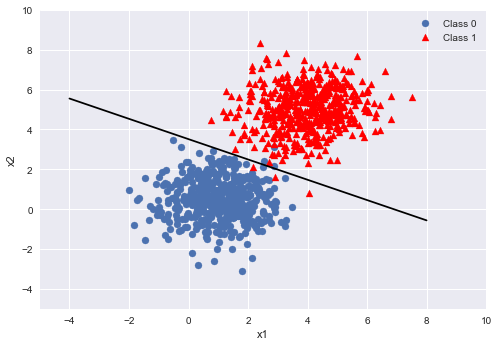

In [76]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1] 
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [6]:
import numpy as np
a = np.random.randn(2, 3) # a.shape = (2, 3)
b = np.random.randn(2, 1) # b.shape = (2, 1)
c = a + b
print(c.shape)

(2, 3)


In [7]:
a = np.random.randn(12288, 150) # a.shape = (12288, 150)
b = np.random.randn(150, 45) # b.shape = (150, 45)
c = np.dot(a,b)
print(c.shape)

(12288, 45)


In [9]:
a = np.random.randn(4, 3) # a.shape = (4, 3)
b = np.random.randn(3, 2) # b.shape = (3, 2)
c = np.dot(a,b)
print(c.shape)

(4, 2)


In [11]:
a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
c = a*b
print(c.shape)

(3, 3)


In [4]:
L1 = [0.1,0.2,0.1,0.6,0.1]
abs(L1)

TypeError: bad operand type for abs(): 'list'

In [11]:
a=[1,23,4,5]
print(a[:,0])

TypeError: list indices must be integers or slices, not tuple